# 3.2.	Основные характеристики набора данных

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('./TSLA.csv')


In [5]:
data.shape

(2416, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2416


In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Date - 0
Open - 0
High - 0
Low - 0
Close - 0
Adj Close - 0
Volume - 0


In [10]:
data['Volume'].unique()

array([18766300, 17187100,  8218800, ..., 29005700, 15719300, 47065000],
      dtype=int64)

# 3.3.	Визуальное исследование датасета

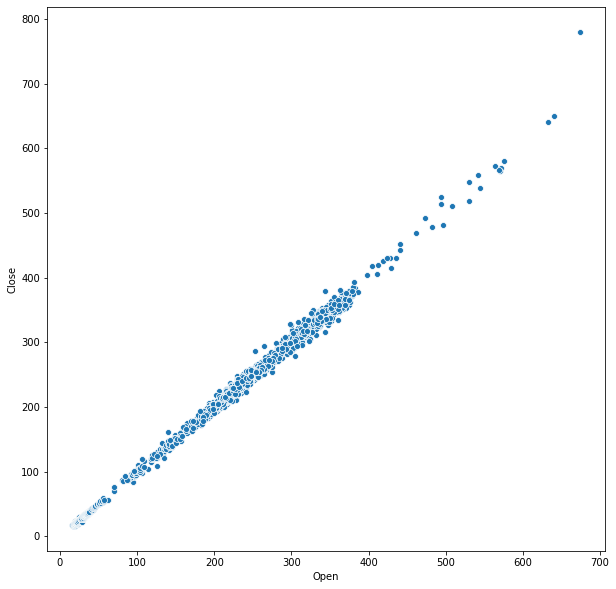

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Open', y='Close', data=data)

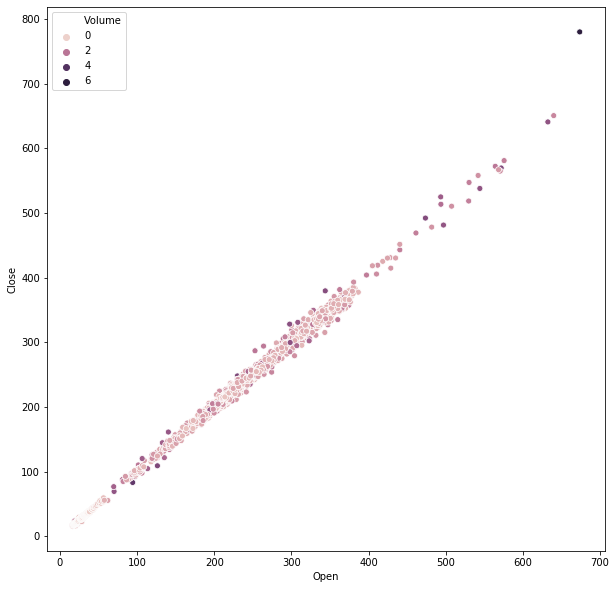

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Open', y='Close', data=data, hue='Volume')

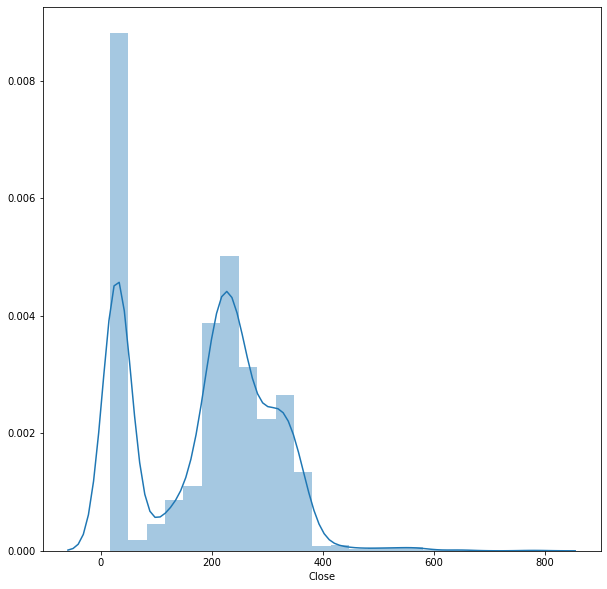

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Close'])

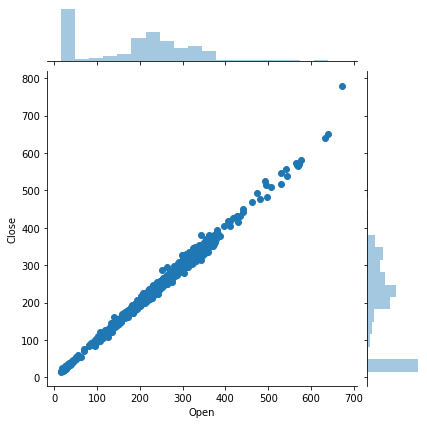

In [14]:
sns.jointplot(x='Open', y='Close', data=data)

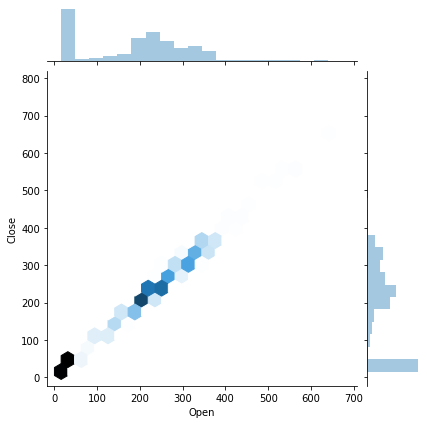

In [15]:
sns.jointplot(x='Open', y='Close', data=data, kind="hex")

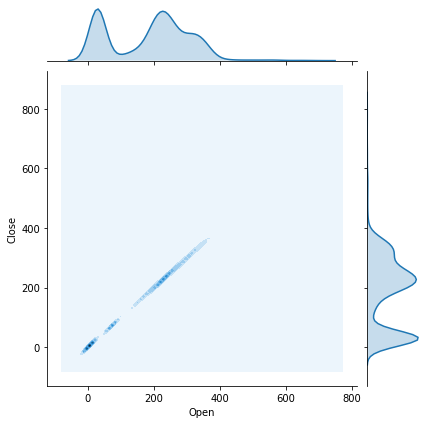

In [16]:
sns.jointplot(x='Open', y='Close', data=data, kind="kde")

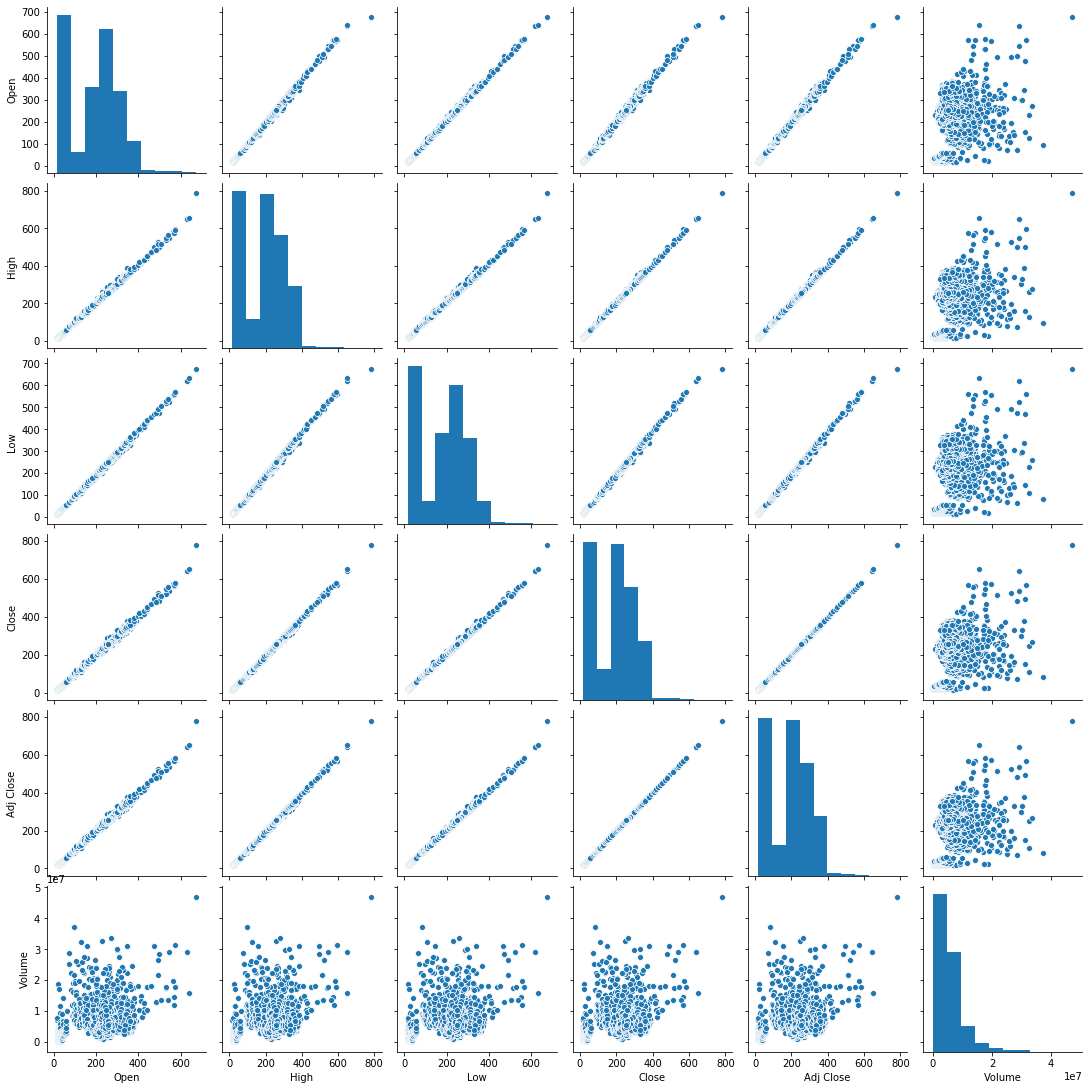

In [17]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data, hue="Volume")

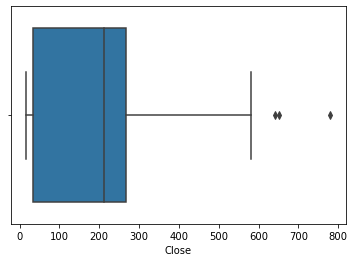

In [4]:
sns.boxplot(x=data['Close'])

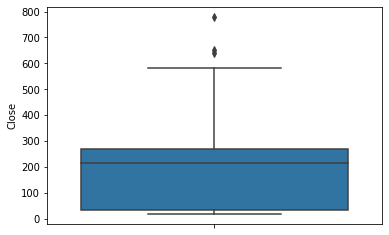

In [8]:
sns.boxplot(y=data['Close'])

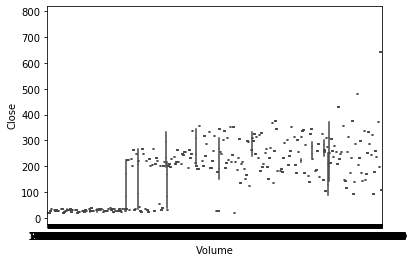

In [5]:
# Распределение параметра Close сгруппированные по Volume.
sns.boxplot(x='Volume', y='Close', data=data)

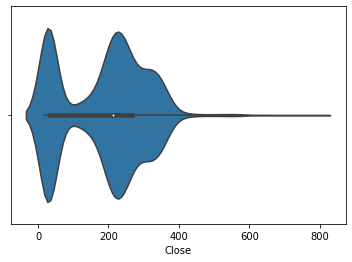

In [11]:
sns.violinplot(x=data['Close'])

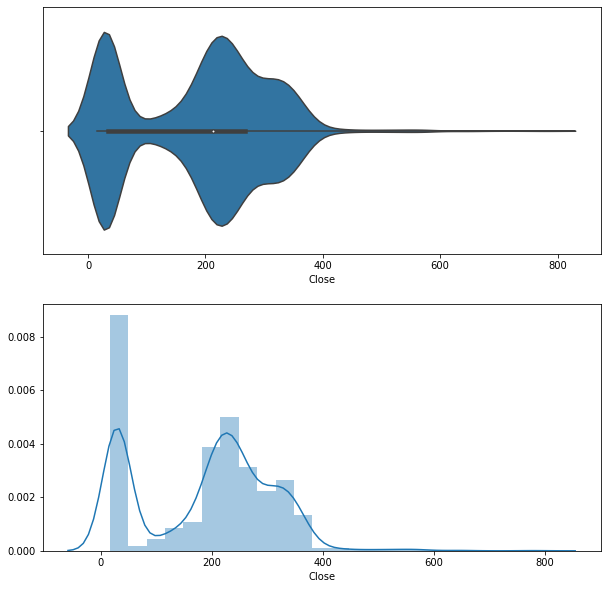

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Close'])
sns.distplot(data['Close'], ax=ax[1])

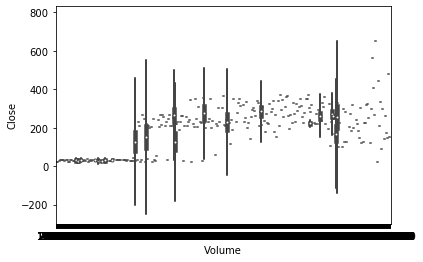

In [6]:
# Распределение параметра Close сгруппированные по Volume.
sns.violinplot(x='Volume', y='Close', data=data)

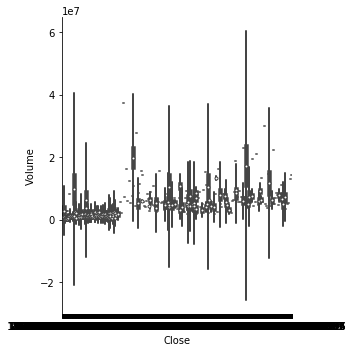

In [7]:
sns.catplot(x='Close', y='Volume', data=data, kind="violin", split=True)

# 3.4.	Информация  о  корреляции признаков

In [15]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:
    - Целевой признак наиболее сильно коррелирует с High (0.51), Close (0.51), Adj Close (0.51). Эти признаки обязательно следует оставить в модели.
    - Close и Adj Close очень сильно коррелируют между собой (1.0). Поэтому из этих признаков в модели можно оставлять только один (Adj Close). Так же Adj Close сильно коррелирует с признаком High, поэтому в модели следует оставить один из них.
    - Целевой признак слабо коррелирует с Low (0.49) и Open (0.5). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

In [16]:
data.corr(method='pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


In [17]:
data.corr(method='kendall')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.977079,0.975793,0.963064,0.963064,0.431806
High,0.977079,1.000000,0.974701,0.977703,0.977703,0.440331
Low,0.975793,0.974701,1.000000,0.977783,0.977783,0.422738
Close,0.963064,0.977703,0.977783,1.000000,1.000000,0.431425
Adj Close,0.963064,0.977703,0.977783,1.000000,1.000000,0.431425
Volume,0.431806,0.440331,0.422738,0.431425,0.431425,1.000000


In [18]:
data.corr(method='spearman')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999020,0.998976,0.997917,0.997917,0.620959
High,0.999020,1.000000,0.998844,0.999124,0.999124,0.629215
Low,0.998976,0.998844,1.000000,0.999125,0.999125,0.612200
Close,0.997917,0.999124,0.999125,1.000000,1.000000,0.620424
Adj Close,0.997917,0.999124,0.999125,1.000000,1.000000,0.620424
Volume,0.620959,0.629215,0.612200,0.620424,0.620424,1.000000


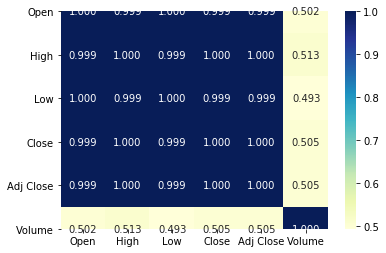

In [19]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

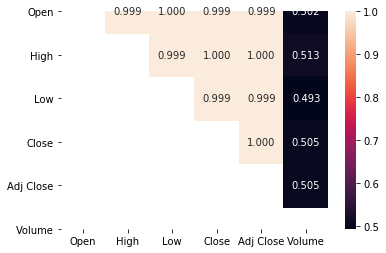

In [24]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

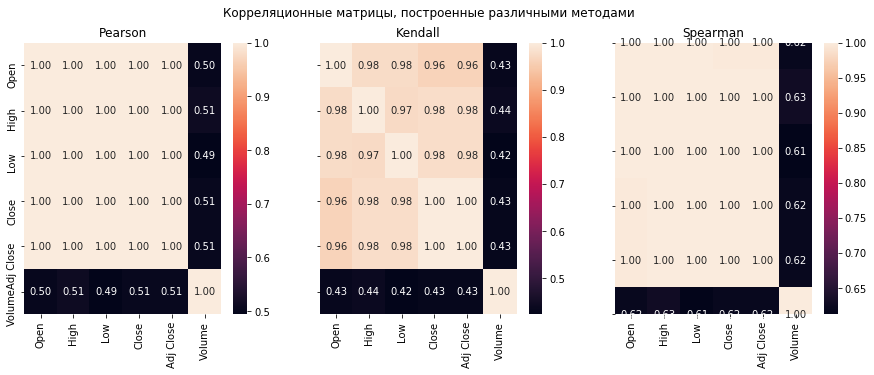

In [25]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

На тепловых картах видно, что признаки достаточно сильно коррелируют друг с другом. Однако, целевой признак наиболее сильно коррелирует с Наивысшей ценой (0.51), Ценой закрытия торгов (0.51), Скорректированной ценой закрытия (0.51). Эти признаки обязательно следует оставить в модели. Цена закрытия торгов и Скорректированная цена закрытия очень сильно коррелируют между собой (1.0). Поэтому из этих признаков в модели можно оставлять только один (Скорректированную цену закрытия). Так же Скорректированная цена закрытия сильно коррелирует с признаком Наивысшая цена, поэтому в модели следует оставить один из них. Целевой признак слабо коррелирует с Самой низкой ценой (0.49) и Начальной ценой (0.5). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

# Список литературы
1.	Гапанюк Ю. Е. Лабораторная работа «Разведочный анализ данных. Исследование и визуализация данных» [Электронный ресурс] // GitHub. – 2019. – Режим досту- па: https://github.com/ugapanyuk/ml_course/wiki/LAB_EDA_VISUALIZATION (дата обращения: 13.02.2019).
2.	Tesla stock data from 2010 to 2020 [Electronic resource] // Kaggle. — 2020. — Access mode: https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020 (online; accessed: 18.02.2020).
3.	Team The IPython Development. IPython 7.3.0 Documentation [Electronic resource] // Read the Docs. — 2019. — Access mode: https://ipython.readthedocs.io/en/ stable/ (online; accessed: 20.02.2019).
4.	Waskom M. seaborn 0.9.0 documentation [Electronic resource] // PyData. — 2018. — Access mode: https://seaborn.pydata.org/ (online; accessed: 20.02.2019).
5.	pandas 0.24.1 documentation [Electronic resource] // PyData. — 2019. — Access mode:
http://pandas.pydata.org/pandas-docs/stable/ (online; accessed: 20.02.2019).
6.	Chrétien M. Convert datetime.time to seconds [Electronic resource] // Stack Over- ﬂow. — 2017. — Access mode: https://stackoverflow.com/a/44823381 (online; ac- cessed: 20.02.2019).
